In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import statsmodels.api as sm
import os
plt.style.use('ggplot')

In [2]:
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
#import data
df_435 = pd.read_csv('435.csv', sep = ',')
df_435 = df_435.set_index('время')
df_435 = df_435
df_435

,газ,масла,смолы,асфальтены,кокс
время,,,,,
0,0.00,0.55,0.37,0.09,0.00
30,0.12,0.55,0.11,0.09,0.13
60,0.15,0.53,0.05,0.08,0.19
90,0.17,0.51,0.03,0.07,0.22
120,0.26,0.26,0.17,0.08,0.24


<AxesSubplot:xlabel='время'>

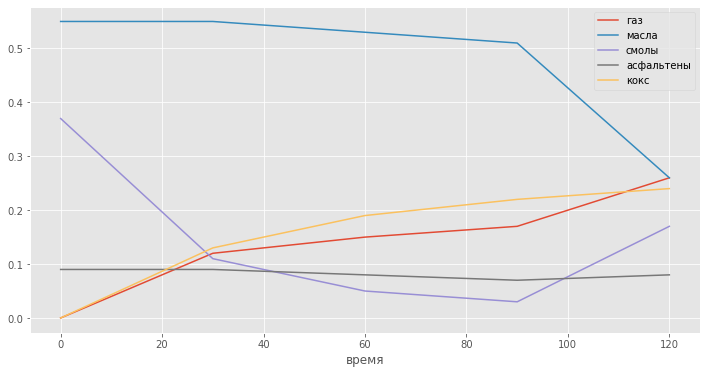

In [4]:
df_435.plot(figsize=(12,6))

In [5]:
ar1 = pd.DataFrame({'Masla_Yt': df_435['масла'], 'Smol_Yt':df_435['смолы'], 'Asvalten_Yt': df_435['асфальтены'], 'Gaz_Yt':df_435['газ'], 'Koks_Yt': df_435['кокс']})
ar1= ar1
ar1

,Masla_Yt,Smol_Yt,Asvalten_Yt,Gaz_Yt,Koks_Yt
время,,,,,
0,0.55,0.37,0.09,0.00,0.00
30,0.55,0.11,0.09,0.12,0.13
60,0.53,0.05,0.08,0.15,0.19
90,0.51,0.03,0.07,0.17,0.22
120,0.26,0.17,0.08,0.26,0.24


### 1) ARIMA для масла

In [6]:
src_data_model =ar1['Masla_Yt']
model1 = sm.tsa.ARIMA(src_data_model, order=(1,0,0)).fit()
#, freq='W # full_output=False, disp=0
print (model1.summary())

                               SARIMAX Results                                
Dep. Variable:               Masla_Yt   No. Observations:                    5
Model:                 ARIMA(1, 0, 0)   Log Likelihood                   3.923
Date:                Thu, 26 Jan 2023   AIC                             -1.847
Time:                        15:43:17   BIC                             -3.019
Sample:                             0   HQIC                            -4.992
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4734      0.217      2.186      0.029       0.049       0.898
ar.L1          0.1943      2.973      0.065      0.948      -5.634       6.022
sigma2         0.0121      0.034      0.359      0.7

C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### 2) ARIMA для смолы

In [7]:
src_data_model = ar1['Smol_Yt']
model2 = sm.tsa.ARIMA(src_data_model, order=(1,0,0)).fit()
#, freq='W # full_output=False, disp=0
print (model2.summary())

                               SARIMAX Results                                
Dep. Variable:                Smol_Yt   No. Observations:                    5
Model:                 ARIMA(1, 0, 0)   Log Likelihood                   3.431
Date:                Thu, 26 Jan 2023   AIC                             -0.862
Time:                        15:43:30   BIC                             -2.034
Sample:                             0   HQIC                            -4.007
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1533      0.114      1.348      0.178      -0.070       0.376
ar.L1          0.1345      0.879      0.153      0.878      -1.587       1.856
sigma2         0.0148      0.026      0.570      0.5

C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### 3) ARIMA для асфальтены

In [8]:
src_data_model = ar1['Asvalten_Yt']
model3 = sm.tsa.ARIMA(src_data_model, order=(1,0,0)).fit()
#, freq='W # full_output=False, disp=0
print (model3.summary())

                               SARIMAX Results                                
Dep. Variable:            Asvalten_Yt   No. Observations:                    5
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  17.722
Date:                Thu, 26 Jan 2023   AIC                            -29.444
Time:                        15:43:36   BIC                            -30.616
Sample:                             0   HQIC                           -32.589
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0826      0.006     12.722      0.000       0.070       0.095
ar.L1          0.3669      0.975      0.376      0.707      -1.544       2.278
sigma2       4.74e-05   7.66e-05      0.619      0.5

C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### 4) ARIMA для кокса

In [9]:
src_data_model = ar1['Koks_Yt']
model4 = sm.tsa.ARIMA(src_data_model, order=(1,0,0)).fit()
#, freq='W # full_output=False, disp=0
print (model4.summary())

                               SARIMAX Results                                
Dep. Variable:                Koks_Yt   No. Observations:                    5
Model:                 ARIMA(1, 0, 0)   Log Likelihood                   5.820
Date:                Thu, 26 Jan 2023   AIC                             -5.639
Time:                        15:43:38   BIC                             -6.811
Sample:                             0   HQIC                            -8.784
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1389      1.577      0.088      0.930      -2.952       3.229
ar.L1          0.6938      6.515      0.106      0.915     -12.076      13.463
sigma2         0.0050      0.140      0.036      0.9

C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### 5) ARIMA для газ

In [10]:
src_data_model = ar1['Gaz_Yt']
model5 = sm.tsa.ARIMA(src_data_model, order=(1,0,0)).fit()
#, freq='W # full_output=False, disp=0
print (model5.summary())

                               SARIMAX Results                                
Dep. Variable:                 Gaz_Yt   No. Observations:                    5
Model:                 ARIMA(1, 0, 0)   Log Likelihood                   5.638
Date:                Thu, 26 Jan 2023   AIC                             -5.276
Time:                        15:43:43   BIC                             -6.447
Sample:                             0   HQIC                            -8.420
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1360      0.069      1.961      0.050       0.000       0.272
ar.L1          0.6218      0.611      1.018      0.308      -0.575       1.818
sigma2         0.0056      0.007      0.799      0.4

C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\roman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### Константы

In [11]:
# c = 0.5310, 0.1491, 0.0800
# c = pd.DataFrame(c)
c = pd.DataFrame({'Masla_Yt' :  0.4707 , 'Smol_Yt': 0.1548 , 'Asvalten_Yt':0.0826,'Koks_Yt': 0.1389, 'Gaz_Yt': 0.1360  }, index = [0])
c

,Masla_Yt,Smol_Yt,Asvalten_Yt,Koks_Yt,Gaz_Yt
0,0.4707,0.1548,0.0826,0.1389,0.136


### Предсказания для моделей ARIMA(масла, смолы, асфальтен, кокс)

In [12]:
predict1 = model1.predict(n_periods=7)
predict1 = predict1.values
predict2 = model2.predict(n_periods=7)
predict2 = predict2.values
predict3 = model3.predict(n_periods=7)
predict3 = predict3.values
predict4 = model4.predict(n_periods=7)
predict4 = predict4.values
predict5 = model5.predict(n_periods=7)
predict5 = predict5.values
ar2 = pd.DataFrame({'Masla_Yt': predict1, 'Smol_Yt':predict2, 'Asvalten_Yt': predict3, 'Koks_Yt': predict4,'Gaz_Yt':predict5 },index = [150,180,210,240,270] )
ar2

,Masla_Yt,Smol_Yt,Asvalten_Yt,Koks_Yt,Gaz_Yt
150,0.473399,0.153254,0.082560,0.138880,0.136027
180,0.488280,0.182406,0.085290,0.042526,0.051445
210,0.488280,0.147436,0.085290,0.132719,0.126061
240,0.484395,0.139366,0.081621,0.174347,0.144716
270,0.480509,0.136676,0.077951,0.195160,0.157152


<AxesSubplot:>

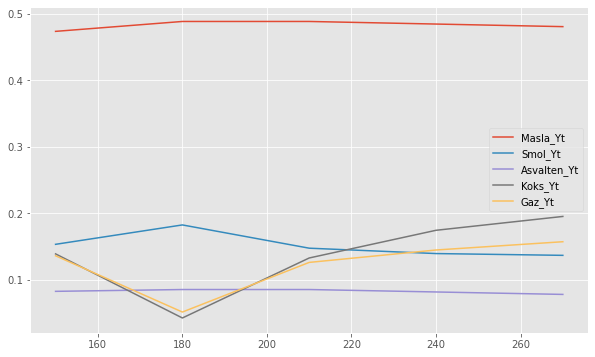

In [13]:
ar2.plot(figsize=(10,6))

## 1) Реализация уравнения для Газа

In [20]:
Gaz_Yt = (ar2['Masla_Yt']**(1.6)) + (ar2['Smol_Yt']**(1.6)) +(ar2['Asvalten_Yt']**(1.6))
Gaz_Yt
ar_Gaz_Yt = pd.DataFrame({'Masla_Yt': ar2['Masla_Yt'], 'Smol_Yt':ar2['Smol_Yt'], 'Asvalten_Yt': ar2['Asvalten_Yt'], 'Gaz_Yt': Gaz_Yt },index = [150,180,210,240,270] )
ar_Gaz_Yt

,Masla_Yt,Smol_Yt,Asvalten_Yt,Gaz_Yt
150,0.473399,0.153254,0.082560,0.370468
180,0.488280,0.182406,0.085290,0.402781
210,0.488280,0.147436,0.085290,0.383814
240,0.484395,0.139366,0.081621,0.374431
270,0.480509,0.136676,0.077951,0.367817


<AxesSubplot:>

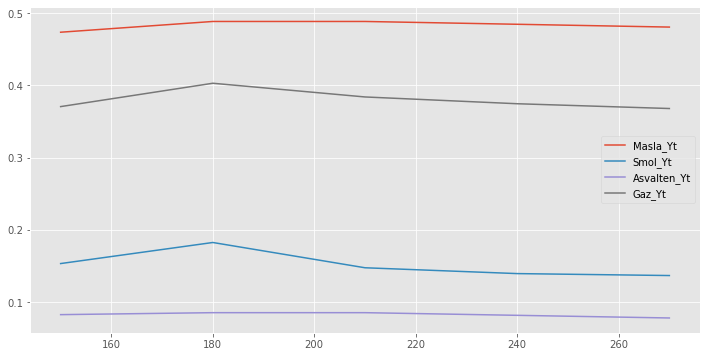

In [21]:
ar_Gaz_Yt.plot(figsize=(12,6))

### Тесты модели Газа

In [22]:
sigma = mean_squared_error(ar1['Gaz_Yt'],ar_Gaz_Yt['Gaz_Yt'])

absolute_error = mean_absolute_error(ar1['Gaz_Yt'], ar_Gaz_Yt['Gaz_Yt'])

# 3.Стандартная относительная ошибка:
#Числитель:
s = ar1['Gaz_Yt'].values
z = ar_Gaz_Yt['Gaz_Yt'].values

are1 = np.sum((abs((s) - (z))))
#Знаменатель:
are2 = np.sum((abs(z)))
#Формула( В '%')
are = (1/len(s))*(are1/are2)*100

print('СКО :', sigma)
print('АО :', absolute_error)
print('Стандарт.относит.откл. :', float(are))

СКО : 0.06505936144048986
АО : 0.23986206424948256
Стандарт.относит.откл. : 12.62890332170406


## 2) Реализация уравнения для Асфалтена

In [32]:
Asv_Yt = (ar2['Masla_Yt']**(1.5)) + (ar2['Smol_Yt']**(1.5))

ar_Asv_Yt = pd.DataFrame({'Masla_Yt': predict1, 'Smol_Yt':predict2, 'Asvalten_Yt': Asv_Yt},index = [150,180,210,240,270] )
ar_Asv_Yt

,Masla_Yt,Smol_Yt,Asvalten_Yt
150,0.473399,0.153254,0.385712
180,0.488280,0.182406,0.419100
210,0.488280,0.147436,0.397807
240,0.484395,0.139366,0.389159
270,0.480509,0.136676,0.383612


<AxesSubplot:>

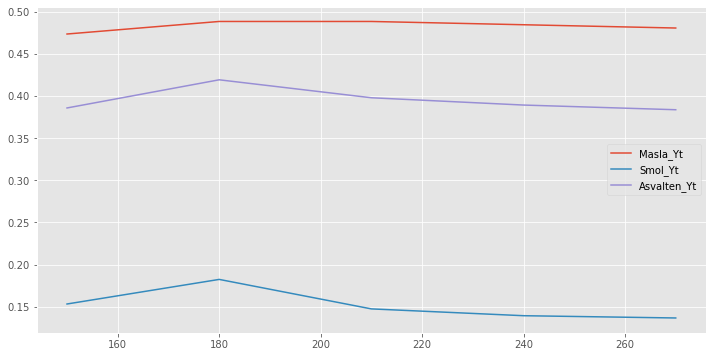

In [33]:
ar_Asv_Yt.plot(figsize=(12,6))

### Тесты модели Асфалтена

In [34]:
sigma = mean_squared_error(ar1['Asvalten_Yt'],ar_Asv_Yt['Asvalten_Yt'])

absolute_error = mean_absolute_error(ar1['Asvalten_Yt'], ar_Asv_Yt['Asvalten_Yt'])

# 3.Стандартная относительная ошибка:
#Числитель:
s = ar1['Asvalten_Yt'].values
z = ar_Asv_Yt['Asvalten_Yt'].values

are1 = np.sum((abs((s) - (z))))
#Знаменатель:
are2 = np.sum((abs(z)))
#Формула( В '%')
are = (1/len(s))*(are1/are2)*100

print('СКО :', sigma)
print('АО :', absolute_error)
print('Стандарт.относит.откл. :', float(are))

СКО : 0.09815930802002518
АО : 0.3130780446021857
Стандарт.относит.откл. : 15.848921441201933


## 3) Реализация уравнения для Кокс

In [35]:
Koks_Yt = (ar2['Asvalten_Yt']**(1)) + (ar2['Gaz_Yt']**(1))

ar_Koks_Yt = pd.DataFrame({'Koks_Yt': Koks_Yt, 'Asvalten_Yt' : ar2['Asvalten_Yt']},index = [150,180,210,240,270] )
ar_Koks_Yt

,Koks_Yt,Asvalten_Yt
150,0.218587,0.082560
180,0.136735,0.085290
210,0.211351,0.085290
240,0.226336,0.081621
270,0.235103,0.077951


<AxesSubplot:>

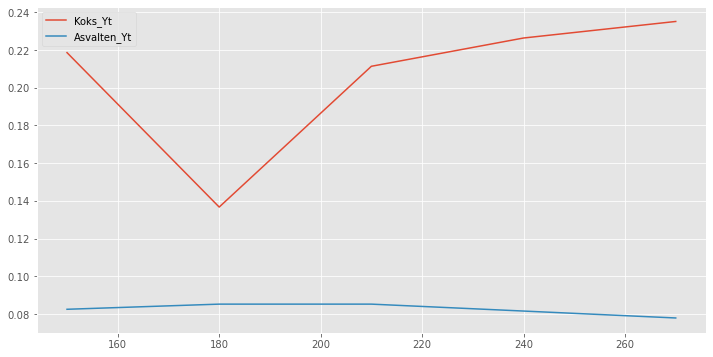

In [36]:
ar_Koks_Yt.plot(figsize=(12,6))

### Тесты модели Кокс

In [37]:
sigma = mean_squared_error(ar1['Koks_Yt'],ar_Koks_Yt['Koks_Yt'])

absolute_error = mean_absolute_error(ar1['Koks_Yt'], ar_Koks_Yt['Koks_Yt'])

# 3.Стандартная относительная ошибка:
#Числитель:
s = ar1['Koks_Yt'].values
z = ar_Koks_Yt['Koks_Yt'].values

are1 = np.sum((abs((s) - (z))))
#Знаменатель:
are2 = np.sum((abs(z)))
#Формула( В '%')
are = (1/len(s))*(are1/are2)*100

print('СКО :', sigma)
print('АО :', absolute_error)
print('Стандарт.относит.откл. :', float(are))

СКО : 0.009669153490181307
АО : 0.05158131398670444
Стандарт.относит.откл. : 5.017088941096483


## 4) Реализация уравнения для Масла

In [44]:
Masla_Yt = ((ar2['Asvalten_Yt'])**(1)) + ((ar2['Smol_Yt'])**(1))
Masla_Yt
ar_Masla_Yt = pd.DataFrame({'Masla_Yt': Masla_Yt,'Asvalten_Yt' : ar2['Asvalten_Yt'],'Smol_Yt' :ar2['Smol_Yt'] },index = [150,180,210,240,270] )
ar_Masla_Yt

,Masla_Yt,Asvalten_Yt,Smol_Yt
150,0.235813,0.082560,0.153254
180,0.267696,0.085290,0.182406
210,0.232726,0.085290,0.147436
240,0.220986,0.081621,0.139366
270,0.214627,0.077951,0.136676


<AxesSubplot:>

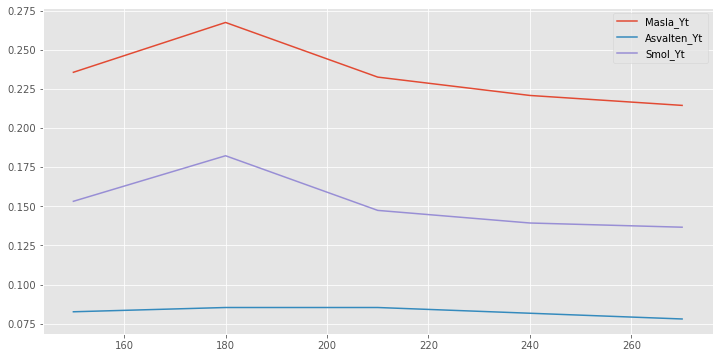

In [45]:
ar_Masla_Yt.plot(figsize=(12,6))

### Тест Масла

In [46]:
sigma = mean_squared_error(ar1['Masla_Yt'],ar_Masla_Yt['Masla_Yt'])

absolute_error = mean_absolute_error(ar1['Masla_Yt'], ar_Masla_Yt['Masla_Yt'])

# 3.Стандартная относительная ошибка:
#Числитель:
s = ar1['Masla_Yt'].values
z = ar_Masla_Yt['Masla_Yt'].values

are1 = np.sum((abs((s) - (z))))
#Знаменатель:
are2 = np.sum((abs(z)))
#Формула( В '%')
are = (1/len(s))*(are1/are2)*100

print('СКО :', sigma)
print('АО :', absolute_error)
print('Стандарт.относит.откл. :', float(are))

СКО : 0.0704736020093323
АО : 0.24563019318793042
Стандарт.относит.откл. : 20.96090759548136


## 5) Реализация уравнения для Смолы

In [47]:
Smol_Yt = ((ar2['Masla_Yt'])**(1.6)) + ((ar2['Asvalten_Yt'])**(1.6))
Smol_Yt
ar_Smol_Yt = pd.DataFrame({'Masla_Yt': Masla_Yt,'Asvalten_Yt' : ar2['Asvalten_Yt'],'Smol_Yt' :Smol_Yt },index = [150,180,210,240,270] )
ar_Smol_Yt

,Masla_Yt,Asvalten_Yt,Smol_Yt
150,0.235813,0.082560,0.320733
180,0.267696,0.085290,0.337066
210,0.232726,0.085290,0.337066
240,0.220986,0.081621,0.331709
270,0.214627,0.077951,0.326407


<AxesSubplot:>

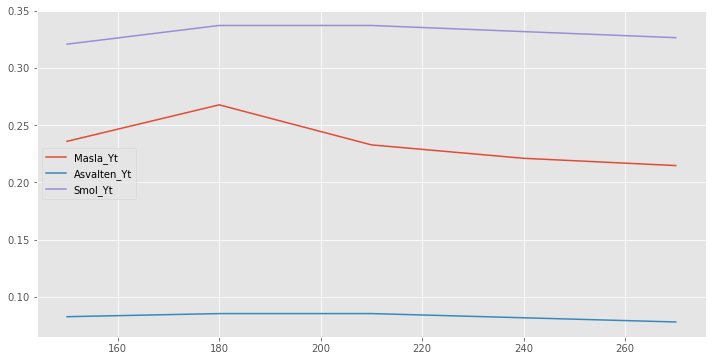

In [48]:
ar_Smol_Yt.plot(figsize=(12,6))

### Тест Смолы

In [49]:
sigma = mean_squared_error(ar1['Smol_Yt'],ar_Smol_Yt['Smol_Yt'])

absolute_error = mean_absolute_error(ar1['Smol_Yt'], ar_Smol_Yt['Smol_Yt'])

# 3.Стандартная относительная ошибка:
#Числитель:
s = ar1['Smol_Yt'].values
z = ar_Smol_Yt['Smol_Yt'].values

are1 = np.sum((abs((s) - (z))))
#Знаменатель:
are2 = np.sum((abs(z)))
#Формула( В '%')
are = (1/len(s))*(are1/are2)*100

print('СКО :', sigma)
print('АО :', absolute_error)
print('Стандарт.относит.откл. :', float(are))

СКО : 0.050376876165731874
АО : 0.20430286340120812
Стандарт.относит.откл. : 12.359664054995449


## Общий график реакций

<AxesSubplot:>

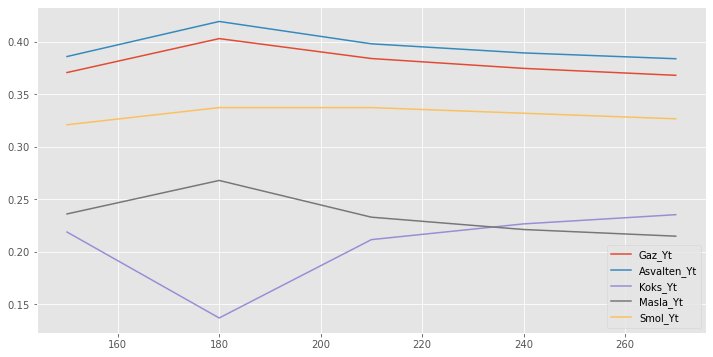

In [50]:
reakcia = pd.DataFrame({'Gaz_Yt':ar_Gaz_Yt['Gaz_Yt'], 'Asvalten_Yt': ar_Asv_Yt['Asvalten_Yt'],'Koks_Yt' :ar_Koks_Yt['Koks_Yt'],
                       'Masla_Yt': ar_Masla_Yt['Masla_Yt'],'Smol_Yt': ar_Smol_Yt['Smol_Yt'] })
reakcia.plot(figsize=(12,6))